## Final Project Submission

Please fill out:
* Student name: CAROLINE KISAULU
* Student pace:  part time/05
* Scheduled project review date/time: 5TH NOVEMBER 2023
* Instructor name: EVERLYN ASIKO

# PROJECT TITLE: REVIEW ON MOVIES

# Overview
This project analyzes movie data from various movie studios to provide insights on the best practices and genres of
movies to help Microsoft set-up a movie studio based on market intelligence backed-up by the analysis. 
The analysis uses movie data from big companies, their genres of production, local and foreign market gross income. 

# Business problem
In our analysis, we are going to find out which are the most popular genres of movies based on their ratings, 
and other movie insights to help Microsoft set up their new movie studio seamlessly.


# Data
For this analysis,we shall perform an exploratory data analysis on .csv movie files collected from various studios for
the year 2010 up to 2018. 

In [1]:
# Import all the relevant libraries to be used for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing zipped data using pandas for analysis
title_df = pd.read_csv("zippedData/title.basics.csv")
rating_df = pd.read_csv("zippedData/title.ratings.csv")
movie_data_df = pd.read_csv("zippedData/tmdb.movies.csv",index_col=0)
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv")
movie_budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv",index_col=0)
# using the index_col=0 argument avoids duplication of the index column

In [3]:
#sampling the various datasets to confirm if the data has properly been imported
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#setting tconst column as the index for title and rating data to merge the two
rating_df.set_index('tconst', inplace=True)
title_df.set_index('tconst', inplace=True)

In [5]:
#joining rating and title data sets 
title_data_with_rating_df = title_df.join(rating_df, how='inner')
title_data_with_rating_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


# Data cleaning

In [6]:
#inspecting and feature engineering the various datasets ready for analysis
df = title_data_with_rating_df
df['averagerating'] = df['averagerating'].astype('int64')

In [7]:
#General information on the title_basic dataset
title_data_with_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  int64  
 6   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.5+ MB


In [8]:
#view statistical characteristics of the data set
title_data_with_rating_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,5.890449,3.523662e+03
std,2.614807,208.574111,1.503997,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.000000,1.400000e+01
50%,2014.000000,91.000000,6.000000,4.900000e+01
75%,2016.000000,104.000000,7.000000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


The data types for the datasets above appear to be as per our expectation and ready for further analysis.

In [9]:
#checking for missing values
title_data_with_rating_df.isna().sum()

primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

we have more missing values on title data which are categorical values compared to rating data
which has no missing values. 
To address this issue, we will change my join to 'inner' so that we review movie data that has been rated.

After changing the join to 'inner', we now have few null values on runtime_minutes and genres columns only.
We shall address the missing values with 'mean' and 'mode' respectively as follows

In [10]:
#Dealing with missing data
df = title_data_with_rating_df
df['runtime_minutes'].fillna(df['runtime_minutes'].mean(),inplace=True)

In [11]:
#Recheck missing data
title_data_with_rating_df.isna().sum()

primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
dtype: int64

In [12]:
#checking the most popular category to fill in missing values on genres
df['genres'].value_counts(normalize=True)

Drama                        0.158955
Documentary                  0.141173
Comedy                       0.076836
Horror                       0.036850
Comedy,Drama                 0.035824
                               ...   
Action,Adventure,Sport       0.000014
Game-Show                    0.000014
Action,Documentary,Horror    0.000014
Drama,Fantasy,War            0.000014
Animation,Crime,Thriller     0.000014
Name: genres, Length: 923, dtype: float64

For this data category, Drama and Documentary are relatively popular generes hence using one to fill in the
missing values would skew our data. We therefore keep the null values by replacing the nulls with a 
value 'missing'

In [13]:
#Filling in the missing values on genre with 'missing'value
df['genres'].fillna('missing', inplace= True)

In [14]:
#Recheck missing data
title_data_with_rating_df.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [15]:
#checking for duplicates in our data set
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,


There are no duplicates in our data set.

#Cleaning movies data set

In [16]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
movie_gross_df.shape

(3387, 5)

In [18]:
#checking for missing values on movie data
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

We have five missing studio values which we can address by droping the rows since they are few and datatype text.
For the domestic_gross, we can fill the missing values with the mean.
40% of the foreign_gross data is missing, we can keep the data and deal with the missing values
The foreign_gross needs to be converted to float64 to fill in the missing values with mean.


In [19]:
#First deal with structural issues by using a placeholder of '0' inplace of nulls
#this allows us to change the data type so that we can get the mean
df = movie_gross_df 
df['foreign_gross'].fillna('0', inplace= True)
df['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [20]:
movie_gross_df.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [21]:
#Clean up the foreign gross column to allow change in data type from object to float
#object values do not have a mean
df['foreign_gross'].replace(',','', inplace= True, regex= True)

In [22]:
df['foreign_gross'] = df['foreign_gross'].str.strip()

In [23]:
df['foreign_gross'] = df['foreign_gross'].astype('float64')

In [24]:
#Replacing back the placeholder '0' with the column mean
df['foreign_gross'].replace(0,df['foreign_gross'].mean(axis=0),inplace=True)

In [25]:
#check null status
movie_gross_df.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [26]:
#fill domestic_gross nulls with mean
df['domestic_gross'].fillna(df['domestic_gross'].mean(),inplace=True)

In [27]:
#Drop Studio null rows from the dataset since they are few
df.dropna(axis = 0, subset=['studio'], inplace=True)

In [28]:
#check null value status
movie_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [29]:
#check for statistical values
movie_gross_df.describe()

,domestic_gross,foreign_gross,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.877129e+07,6.301848e+07,2013.959787
std,6.674880e+07,1.076101e+08,2.477735
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.230000e+05,1.170000e+07,2012.000000
50%,1.400000e+06,4.502979e+07,2014.000000
75%,2.874585e+07,4.502979e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [30]:
#check for duplicates in the movie_gross dataset
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


There are no duplicates in this dataset

# Data exploration and analysis

In [31]:
title_data_with_rating_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.00000,73856.000000,7.385600e+04
mean,2014.276132,94.65404,5.890449,3.523662e+03
std,2.614807,197.52143,1.503997,3.029402e+04
min,2010.000000,3.00000,1.000000,5.000000e+00
25%,2012.000000,83.00000,5.000000,1.400000e+01
50%,2014.000000,93.00000,6.000000,4.900000e+01
75%,2016.000000,101.00000,7.000000,2.820000e+02
max,2019.000000,51420.00000,10.000000,1.841066e+06


The average movie length is 94 minutes.
The maximum runtime is 51420 minutes possibly a series/documentary

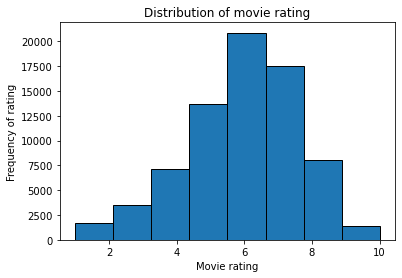

In [32]:
#Histogram plot to show the distribution of movie ratings
df= title_data_with_rating_df
x = df["averagerating"]
plt.hist(x, bins=8, edgecolor="black")

plt.xlabel('Movie rating')
plt.ylabel('Frequency of rating')
plt.title('Distribution of movie rating')
plt.show()

The movie ratings are slightly skewed to the right indicating positive reviews on movies.
However, most of the movies have an average rating with the highest frequency at the
middle of the graph.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  float64
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  int64  
 6   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.5+ MB


In [34]:
#slicing data to form a subset of the main data
data= df.loc[:, ['start_year', 'averagerating']]
data.head()

,start_year,averagerating
tconst,,
tt0063540,2013,7
tt0066787,2019,7
tt0069049,2018,6
tt0069204,2018,6
tt0100275,2017,6


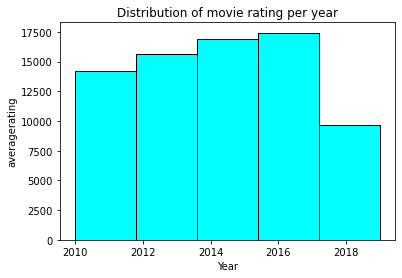

In [35]:
#Distributing ratings by year
x = data['start_year']
plt.hist(x, bins=5, edgecolor="black",color= 'cyan')

plt.xlabel('Year')
plt.ylabel('averagerating')
plt.title('Distribution of movie rating per year')
plt.show()

#Observations
It is surprising that old movies have fewer ratings. We expect them to have higher ratings
since they have been in the market longer.
We can deduce that movie production has been improving over the years hence the reverse rating  observation.
we also observe that our dataset has 2017 movies data missing which is worth investigation.
Microsoft should emulate the most recent movie production to perform better in the movie industry.

In [36]:
df= title_data_with_rating_df
#splitting the genre column from a combination of genres
genre_df= (df.set_index(
    ['primary_title', 'original_title','start_year','runtime_minutes','averagerating','numvotes'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 

In [37]:
#to obtain most popular genre by number of votes
grouped_genre_df= genre_df.groupby('genres').sum()
sorted_grouped_genre_df =grouped_genre_df.sort_values('numvotes', ascending=False)
sorted_grouped_genre_df.head()

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
Drama,62014129,3.021544e+06,183509,119567500
Action,14075802,7.203139e+05,37546,101161682
Adventure,7688595,3.580982e+05,21946,84232589
Comedy,34826440,1.676259e+06,96109,74305805
Thriller,16552365,7.911187e+05,42729,48155313


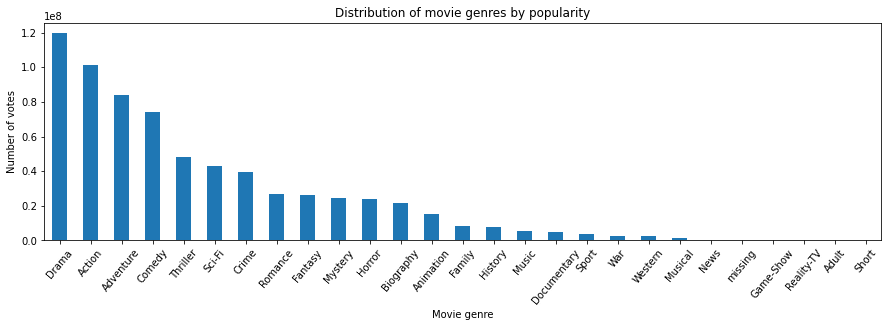

In [38]:
data=sorted_grouped_genre_df['numvotes']
plt.figure(figsize=(15,4))
data.plot(kind='bar')
plt.xticks(rotation=50)
plt.xlabel("Movie genre")
plt.ylabel("Number of votes")
plt.title('Distribution of movie genres by popularity')
plt.show();

The top popular movie genres by popularity are Drama, Action, Adventure, Comedy and Thriller

In [39]:
#Movie gross analysis

In [40]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [41]:
#calculate total gross by concanating domestic and foreign gross
movie_gross_df['Total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [42]:
#grouping income by studio and sorting from highest to lowest
grouped_studio_df= movie_gross_df.groupby('studio').sum()
sorted_grouped_studio_df =grouped_studio_df.sort_values('Total_gross', ascending=False)
sorted_grouped_studio_df.head(10)

,domestic_gross,foreign_gross,year,Total_gross
studio,,,,
BV,1.841903e+10,2.588391e+10,213451,4.430294e+10
WB,1.216805e+10,1.911820e+10,281941,3.128625e+10
Fox,1.094950e+10,2.014593e+10,273882,3.109543e+10
Uni.,1.290239e+10,1.698986e+10,296082,2.989225e+10
Sony,8.488429e+09,1.412547e+10,221575,2.261390e+10
Par.,7.685871e+09,1.217859e+10,203417,1.986446e+10
WB (NL),3.995700e+09,6.384030e+09,90644,1.037973e+10
LGF,4.147709e+09,5.158066e+09,207437,9.305775e+09
LG/S,2.078200e+09,3.533843e+09,82599,5.612043e+09


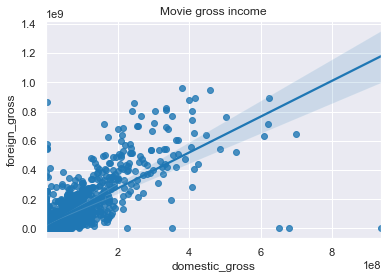

In [43]:
#check for correlation between domestic and foreign income using a scatter plot
df = movie_gross_df
sns.set_style('darkgrid')
sns.set_context('notebook')

# use the function regplot to make a scatterplot
sns.regplot(x=df["domestic_gross"], y=df["foreign_gross"]).set(title= 'Movie gross income');

There is a positive correlation between domestic income and foreign income.

In [44]:
# check the count of movies per studio
top_studios=movie_gross_df['studio'].value_counts().sort_values(ascending=False)
top_studios.head(10)

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

We notice the top 10 studios in count of movies are also the top 10 in total gross.

# conclusion

1. All rated movies have an average run time of about 90 minutes. we only have 2 outliers which are possibly 
    series movies.
2. The top five most popular movie genres are Drama, Action, Adventure, Comedy and Thriller.
3. Foreign income is higher compared to domestic income for movie sellers.
4. The top movie producers in numbers are also leading in gross revenue from movie production.

# Recommendations

1. Microsoft should invest in average length movies in runtime of approximately 90 minutes.
2. Microsoft should start by venturing into the most popular movie genres i.e., Drama, Action,
    Adventure, Comedy and Thriller movies.
3. The company should also focus on foreign market for example using a universal language or ability
    to translate their movies as foreign income is higher than domestic income for movie sellers.
4. Microsoft should budget for mass production of movies for wider market penetration and increase 
    their gross income.